In [3]:
import torch
import torch.nn.functional as F
from DCNN.feature_extractors import Stft, IStft


win_len = 400
win_inc = 100
fft_len = 512
fbins = int(fft_len/2 + 1)
# fbins=
avg_mode = 'freq'

stft = Stft(n_dft=fft_len, hop_size=win_inc, win_length=win_len)
istft = IStft(n_dft=fft_len, hop_size=win_inc, win_length=win_len)

def magnitude_squared_coherence(left_signal, right_signal):
    # Compute the Short-Time Fourier Transform (STFT) for left and right signals
    left_stft = stft(left_signal)
    right_stft =stft(right_signal)

    
    # Calculate the Cross-Power Spectral Density (CPSD)
    cpsd = left_stft * right_stft.conj()
    
    # Calculate the Auto-Power Spectral Density (APSD) for left and right signals
    left_apsd = left_stft * left_stft.conj()
    right_apsd = right_stft * right_stft.conj()
    
    # Calculate the Magnitude Squared Coherence (MSC)
    msc = torch.abs(cpsd)**2 / ((left_apsd.abs() * right_apsd.abs()))
    print(left_apsd)
  
    return msc

# Example usage
# left_signal = torch.randn(1, 44100)  # Replace with your left ear signal
# right_signal = torch.randn(1, 44100)  # Replace with your right ear signal

# msc = magnitude_squared_coherence(left_signal, right_signal)


In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchaudio


    # ... (code for calculating MSC, as previously shown) ...

# Example usagebin_sig,sample_rate = torchaudio.load('/Users/vtokala/Documents/Research/Databases/Dataset_Binaural_2S/iso_wgn.wav')

print(bin_sig.shape)
left_signal = bin_sig[0,:] # Replace with your left ear signal
right_signal = bin_sig[1,:]   # Replace with your right ear signal

msc = magnitude_squared_coherence(left_signal, right_signal)

# Create a frequency axis for the plot (assuming a sample rate of 44100 Hz)
# sample_rate = 44100



NameError: name 'bin_sig' is not defined

In [ ]:
msc.shape
msc

tensor([[4.3517e-02, 3.9097e-02, 9.8276e-01,  ..., 4.3119e-01, 7.7674e-01,
         8.3083e-01],
        [9.9688e-01, 9.9527e-01, 9.8586e-01,  ..., 1.9859e-01, 4.5867e-01,
         5.0080e-01],
        [9.9979e-01, 9.9951e-01, 9.8990e-01,  ..., 4.9519e-03, 6.4405e-03,
         2.0498e-03],
        ...,
        [2.2005e-01, 9.1247e-03, 1.3936e-01,  ..., 8.0882e-13, 4.1717e-12,
         9.2940e-13],
        [2.3282e-01, 2.4778e-02, 1.9191e-02,  ..., 1.0516e-12, 1.0238e-11,
         4.7745e-12],
        [2.1964e-01, 1.7163e-02, 5.2552e-03,  ..., 2.4814e-12, 9.6574e-12,
         2.3824e-12]])

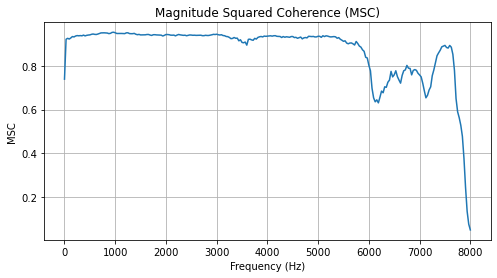

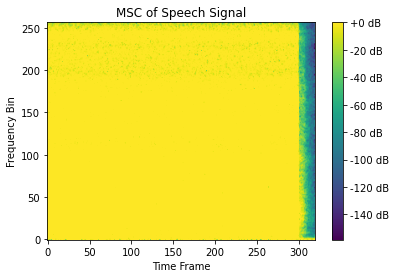

In [ ]:
import librosa.display



frequency_axis = torch.linspace(0, sample_rate / 2, msc.size(0))

    # Plot the MSC values as a function of frequency
plt.figure(figsize=(8, 4))
plt.plot(frequency_axis, msc.mean(dim=1).numpy())
plt.title('Magnitude Squared Coherence (MSC)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('MSC')
plt.grid(True)
plt.show()

msc_db = 10 * torch.log10(msc)



plt.figure()
plt.imshow(msc_db.numpy(), cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(format='%+2.0f dB')
plt.ylabel('Frequency Bin')
plt.xlabel('Time Frame')
plt.title('MSC of Speech Signal')
plt.show()

In [ ]:
import torch
import torch.nn.functional as F

def interaural_coherence(left_signal, right_signal):
    # Compute STFT
    left_stft = stft(left_signal)
    right_stft = stft(right_signal)

    # Calculate Cross-Spectral Density (CSD)
    csd = left_stft.conj() * right_stft

    # Calculate Auto-Spectral Densities (ASD)
    left_asd = torch.abs(left_stft)**2
    right_asd = torch.abs(right_stft)**2

    # Calculate Interaural Coherence
    coherence = torch.abs(csd) / torch.sqrt(left_asd * right_asd)

    return coherence

# Example usage
bin_coh = interaural_coherence(left_signal,right_signal)



In [ ]:
import torch
import torch.fft as fft
import torch.nn.functional as F

def coherence(x, y, fs=1.0, window='hann', nperseg=256, noverlap=None,
              nfft=None, detrend='constant', axis=-1):
    """
    Estimate the magnitude squared coherence estimate, Cxy, of
    discrete-time signals X and Y using Welch's method.

    Parameters
    ----------
    x : torch.Tensor
        Time series of measurement values
    y : torch.Tensor
        Time series of measurement values
    fs : float, optional
        Sampling frequency of the `x` and `y` time series. Defaults
        to 1.0.
    window : str or tuple or torch.Tensor, optional
        Desired window to use. If `window` is a string or tuple, it is
        passed to `torch.hann_window` to generate the window values.
        If `window` is a torch.Tensor, it will be used directly as the
        window, and its length must be nperseg. Defaults to a Hann window.
    nperseg : int, optional
        Length of each segment. Defaults to 256.
    noverlap: int, optional
        Number of points to overlap between segments. If `None`,
        ``noverlap = nperseg // 2``. Defaults to `None`.
    nfft : int, optional
        Length of the FFT used, if a zero-padded FFT is desired. If
        `None`, the FFT length is `nperseg`. Defaults to `None`.
    detrend : str or function or `False`, optional
        Specifies how to detrend each segment. If `detrend` is a
        string, it is passed as the `type` argument to the `F.detrend`
        function. If it is a function, it takes a segment and returns a
        detrended segment. If `detrend` is `False`, no detrending is
        done. Defaults to 'constant'.
    axis : int, optional
        Axis along which the coherence is computed for both inputs; the
        default is over the last axis (i.e. ``axis=-1``).

    Returns
    -------
    f : torch.Tensor
        Array of sample frequencies.
    Cxy : torch.Tensor
        Magnitude squared coherence of x and y.
    """

    if not isinstance(x, torch.Tensor):
        raise ValueError("Input 'x' must be a PyTorch tensor.")
    if not isinstance(y, torch.Tensor):
        raise ValueError("Input 'y' must be a PyTorch tensor.")

    # Check if inputs have the same shape
    if x.shape != y.shape:
        raise ValueError("Input tensors 'x' and 'y' must have the same shape.")

    # Convert fs to a PyTorch tensor
    fs_tensor = torch.tensor(fs)

    # Compute the number of samples and segments
    n_samples = x.shape[axis]
    n_segments = n_samples // nperseg

    # Create the Hann window
    if isinstance(window, str) or isinstance(window, tuple):
        window = torch.hann_window(nperseg)
    elif isinstance(window, torch.Tensor):
        if window.shape != (nperseg,):
            raise ValueError("Input 'window' must have the same length as 'nperseg'.")
    else:
        raise ValueError("Invalid 'window' parameter.")

    # Compute the power spectral density estimates of x and y
    Pxx = torch.zeros((n_segments, nfft // 2 + 1), dtype=x.dtype)
    Pyy = torch.zeros((n_segments, nfft // 2 + 1), dtype=x.dtype)

    for i in range(n_segments):
        start = i * nperseg
        end = start + nperseg

        segment_x = x.narrow(axis, start, nperseg)
        segment_y = y.narrow(axis, start, nperseg)

        # Apply detrending if specified
        if detrend != 'constant':
            segment_x = F.detrend(segment_x, type=detrend)
            segment_y = F.detrend(segment_y, type=detrend)

        # Compute FFT of segments
        fft_x = fft.rfft(segment_x * window, n=nfft)
        fft_y = fft.rfft(segment_y * window, n=nfft)

        # Compute power spectral density
        Pxx[i] = (fft_x.abs() ** 2) / (nperseg * fs_tensor)
        Pyy[i] = (fft_y.abs() ** 2) / (nperseg * fs_tensor)

    # Compute the cross-spectral density estimate as complex tensors
    Pxy = torch.zeros((n_segments, nfft // 2 + 1), dtype=fft_x.dtype)
    for i in range(n_segments):
        Pxy[i] = fft_x.conj() * fft_y

    # Compute the magnitude squared coherence
    Cxy = (Pxy.abs() ** 2) / (Pxx * Pyy)

    # Compute the frequency axis
    freqs = torch.fft.rfftfreq(nfft, 1.0 / fs)

    return freqs, Cxy


In [ ]:
window = torch.hann_window(win_len)
f,Cxy = coherence(left_signal,right_signal,fs=sample_rate,nfft=512,nperseg=len(left_signal))
print(Cxy.shape)
print(f.shape)


torch.Size([1, 257])
torch.Size([257])


In [7]:
import torch
import torch.fft as fft

def mscohere(x, y, nperseg=None, noverlap=None, nfft=None):
    """
    Compute the magnitude squared coherence between two signals using PyTorch.
    
    Args:
        x (torch.Tensor): Input signal 1.
        y (torch.Tensor): Input signal 2.
        nperseg (int): Length of each segment for the FFT. Default is None.
        noverlap (int): Number of overlapping samples between segments. Default is None.
        nfft (int): Length of the FFT used. Default is None.
    
    Returns:
        torch.Tensor: Magnitude squared coherence between the two signals.
    """
    
    if nperseg is None:
        nperseg = min(len(x), 256)  # Default value for nperseg
        
    if noverlap is None:
        noverlap = nperseg // 2  # Default value for noverlap
    
    if nfft is None:
        nfft = 2 * nperseg  # Default value for nfft

    # Compute the spectrograms of x and y
    _, _, Sxx = spectrogram(x, nperseg, noverlap, nfft)
    _, _, Syy = spectrogram(y, nperseg, noverlap, nfft)
    
    # Compute the cross-spectral density
    _, _, Sxy = spectrogram(x, y, nperseg, noverlap, nfft)
    
    # Compute the magnitude squared coherence
    coh = torch.abs(Sxy)**2 / (Sxx * Syy)
    
    return coh

def spectrogram(x, y=None, nperseg=None, noverlap=None, nfft=None):
    """
    Compute the spectrogram of a signal using PyTorch.
    
    Args:
        x (torch.Tensor): Input signal.
        y (torch.Tensor): If given, compute the cross-spectral density between x and y.
        nperseg (int): Length of each segment for the FFT. Default is None.
        noverlap (int): Number of overlapping samples between segments. Default is None.
        nfft (int): Length of the FFT used. Default is None.
    
    Returns:
        torch.Tensor: Frequencies, times, and spectrogram matrix.
    """
    
    if y is not None:
        # Compute cross-spectral density
        Pxy = cross_spectral_density(x, y, nperseg, noverlap, nfft)
        freqs, times = compute_freq_time(x, nperseg, noverlap)
        return freqs, times, Pxy
    
    # Compute power spectral density
    Pxx = power_spectral_density(x, nperseg, noverlap, nfft)
    freqs, times = compute_freq_time(x, nperseg, noverlap)
    return freqs, times, Pxx

def power_spectral_density(x, nperseg, noverlap, nfft):
    # Compute the power spectral density
    freqs, Pxx = compute_spectrum(x, nperseg, noverlap, nfft)
    return Pxx

def cross_spectral_density(x, y, nperseg, noverlap, nfft):
    # Compute the cross-spectral density between x and y
    freqs, Pxy = compute_spectrum(x, y, nperseg, noverlap, nfft)
    return Pxy

def compute_spectrum(x, y=None, nperseg=None, noverlap=None, nfft=None):
    # Compute the spectrum of x (or the cross-spectrum between x and y)
    if y is None:
        x_fft = fft.fft(x, n=nfft)
        Pxx = torch.abs(x_fft)**2
        freqs = fft.fftfreq(nfft)
    else:
        x_fft = fft.fft(x, n=nfft)
        y_fft = fft.fft(y, n=nfft)
        Pxy = x_fft * torch.conj(y_fft)
        freqs = fft.fftfreq(nfft)
    
    return freqs, Pxx if y is None else Pxy

def compute_freq_time(x, nperseg, noverlap):
    # Compute frequencies and times for the spectrogram
    n = len(x)
    hop_size = nperseg - noverlap
    num_segments = (n - noverlap) // hop_size
    times = torch.arange(num_segments) * hop_size / x.sr
    freqs = torch.linspace(0, 0.5, nperseg // 2) * x.sr
    return freqs, times


In [9]:

bin_sig,sample_rate = torchaudio.load('/Users/vtokala/Documents/Research/Databases/Dataset_Binaural_2S/iso_wgn.wav')
# Example usage

print(bin_sig.shape)
x = bin_sig[0,:] # Replace with your left ear signal
y = bin_sig[1,:]
coh = mscohere(x, y, nperseg=2048,noverlap=100,nfft=512)

# Frequency axis (assuming you have computed it in your mscohere function)
# You can replace this with the actual frequency values you used.
freqs = torch.linspace(0, 0.5, len(coh))

# Plot the coherence vs. frequency
plt.figure(figsize=(8, 6))
plt.plot(freqs, coh)
plt.title('Coherence vs. Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.grid(True)
plt.show()

torch.Size([2, 32000])


TypeError: fft_fft(): argument 'input' (position 1) must be Tensor, not int